# Sample Proposal Audit Data


In [1]:
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(tidymodels)
library(readr)
library(stringr)
install.packages('data.table') 
library(data.table)
#install.packages("ggpubr")
#library(ggpubr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ──────────

An audit is an examination of a company’s financial statements and records. Audit fraud is when these records are deliberately and illegally altered in order to benefit the company’s image or status. This problem is detrimental to the global financial system because fraud “undermines the trust that is required for a well-functioning market economy” (cite). The aim of our project is to ___. In conducting our data analysis, we used the audit datasets from UCI Machine Learning Repository accessed through the Canvas website. The datasets present non-confidential data collected from the Auditor Office of India on firms from the years 2015 to 2016. It provides information such as the value of money associated with past audit misstatements, the average loss that the firm has experienced in the past ten years, and the identification of the city or province in which the firm was located. We used this data to answer our research question: ___.


In [3]:
auditRisk <- read_csv("data/audit_risk.csv")

trial <- read_csv("data/trial.csv")


Warning message:
“Duplicated column names deduplicated: 'Score_B' => 'Score_B_1' [11]”
Parsed with column specification:
cols(
  .default = col_double(),
  LOCATION_ID = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  Sector_score = col_double(),
  LOCATION_ID = col_character(),
  PARA_A = col_double(),
  SCORE_A = col_double(),
  PARA_B = col_double(),
  SCORE_B = col_double(),
  TOTAL = col_double(),
  numbers = col_double(),
  Marks = col_double(),
  Money_Value = col_double(),
  MONEY_Marks = col_double(),
  District = col_double(),
  Loss = col_double(),
  LOSS_SCORE = col_double(),
  History = col_double(),
  History_score = col_double(),
  Score = col_double(),
  Risk = col_double()
)



In [4]:
auditRiskSampling <- auditRisk%>%
    select(Sector_score, LOCATION_ID, PARA_A, PARA_B, TOTAL, Money_Value, History, Audit_Risk)%>%
    drop_na()
auditRiskSampling



Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,Money_Value,History,Audit_Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,2.50,6.68,3.380,0,1.71480
3.89,6,0.00,4.83,4.83,0.940,0,0.51080
3.89,6,0.51,0.23,0.74,0.000,0,0.30960
3.89,6,0.00,10.80,10.80,11.750,0,3.50600
3.89,6,0.00,0.08,0.08,0.000,0,0.28320
3.89,6,0.00,0.83,0.83,2.950,0,0.43120
3.89,7,1.10,7.41,8.51,44.950,0,6.35480
3.89,8,8.50,12.03,20.53,7.790,0,3.60680
3.89,8,8.40,11.05,19.45,7.340,0,3.44120


This is an example of some of the Parameters we will be investigating in our study. 


Audit  Data of Companies in India. Given that there is a limited number of sectors available. Research Q: Using Classification model to classify and identity potentially fradulent firms given the survey data 

Exploratory Data Analysis 
1. paraA to Audit_Risk 
2. paraB to Audit_Risk
3. MoneyValues to Audit_Risk

[1] 0.2196955


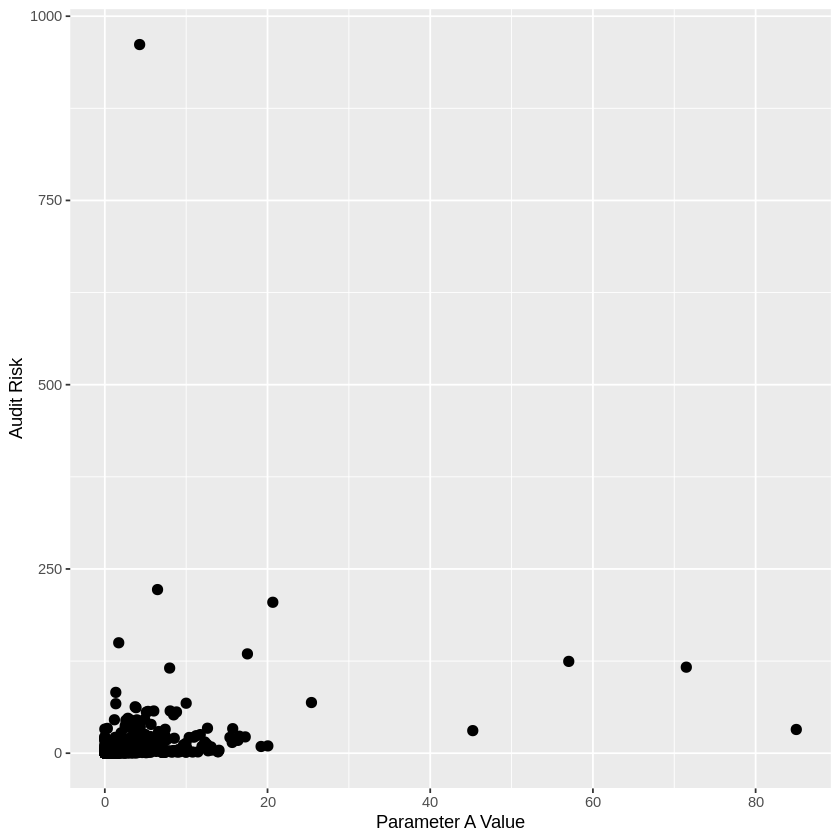

In [5]:
#auditRiskSampling$PARA_A 


auditRiskSampling_ParaA_AuditRisk <-    ggplot(auditRiskSampling,  aes(x= PARA_A, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "Parameter A Value", y = "Audit Risk") 
    
auditRiskSampling_ParaA_AuditRisk

print(cor(auditRiskSampling$PARA_A, auditRiskSampling$Audit_Risk)) #Correlation of Para_B and Audit_Risk

[1] 0.8877894


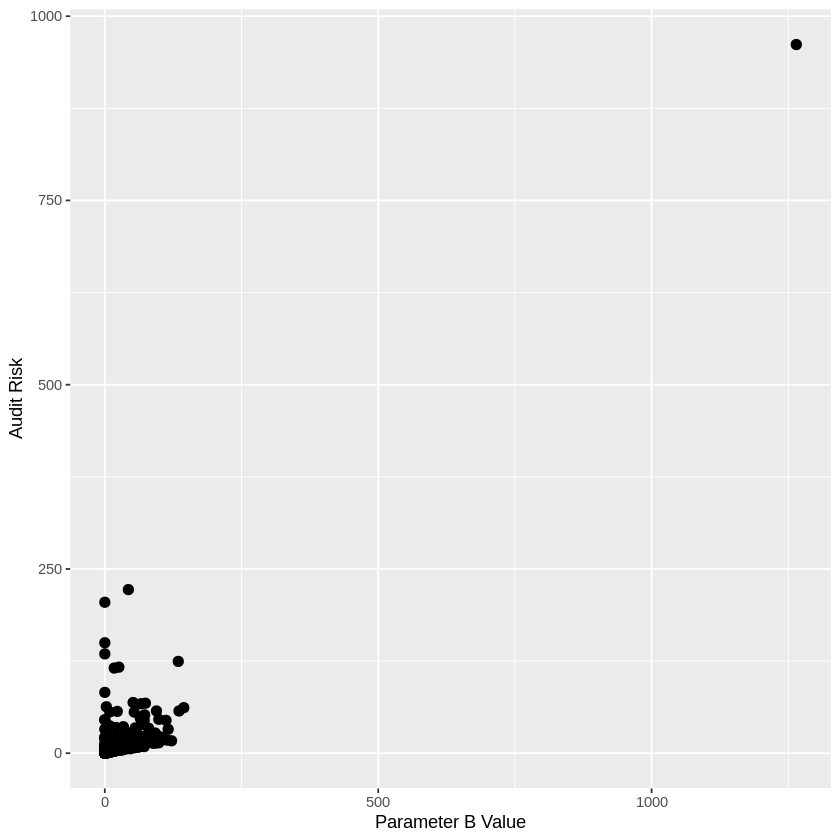

In [6]:
# Parameter B 

auditRiskSampling_ParaB_AuditRisk <-    ggplot(auditRiskSampling,  aes(x= PARA_B, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "Parameter B Value", y = "Audit Risk") 
    
auditRiskSampling_ParaB_AuditRisk

print(cor(auditRiskSampling$PARA_B, auditRiskSampling$Audit_Risk)) #Correlation of Para_B and Audit_Risk

[1] 0.8880932


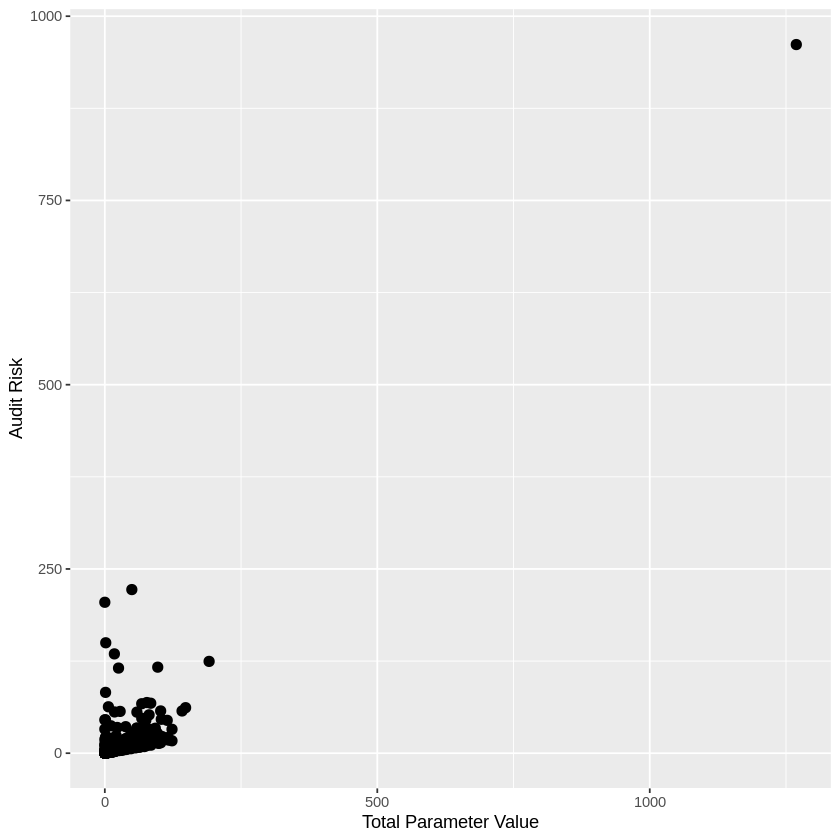

In [7]:
# Total of Parameter A and Parameter B 

auditRiskSampling_TOTAL_AuditRisk <-    ggplot(auditRiskSampling,  aes(x= TOTAL, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "Total Parameter Value", y = "Audit Risk") 
    
auditRiskSampling_TOTAL_AuditRisk

print(cor(auditRiskSampling$TOTAL, auditRiskSampling$Audit_Risk))

[1] 0.3340511


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.090  14.138   5.595 935.030 

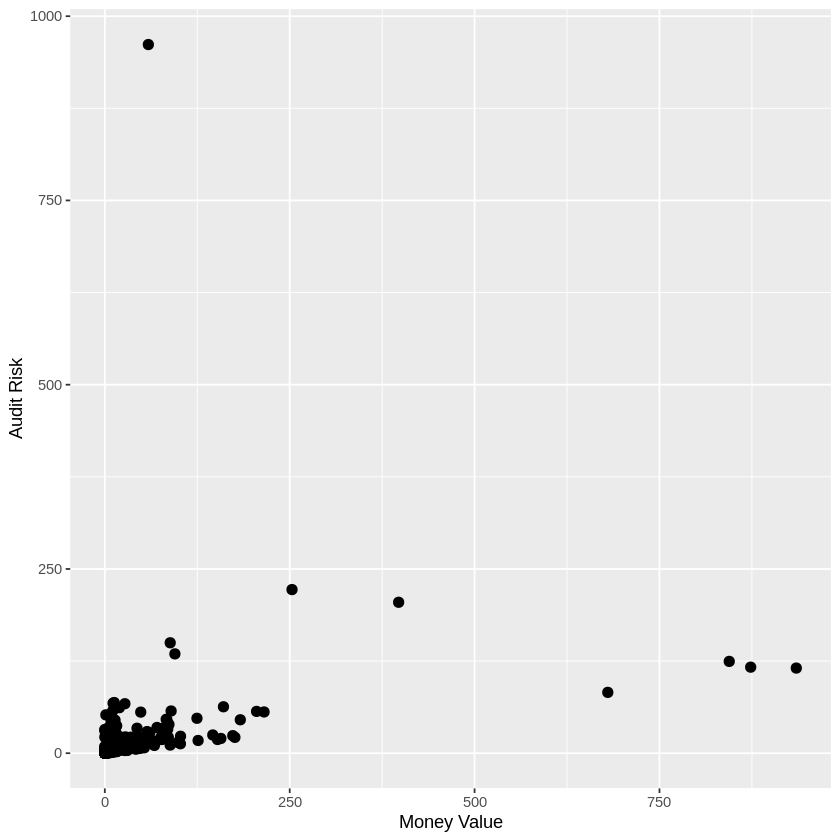

In [8]:
# Money Value to Audit Risk 


auditRiskSampling_MoneyVal_AudRisk <-    ggplot(auditRiskSampling,  aes(x= Money_Value, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "Money Value", y = "Audit Risk") 
    
auditRiskSampling_MoneyVal_AudRisk

print(cor(auditRiskSampling$Money_Value, auditRiskSampling$Audit_Risk)) #Correlation of Para_B and Audit_Risk

summary(auditRiskSampling$Money_Value)

***Below are examples of using catagorical variables for the process. Might not be too useful in the Regression Example! ***

[1] 0.3297424


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1045  0.0000  9.0000 

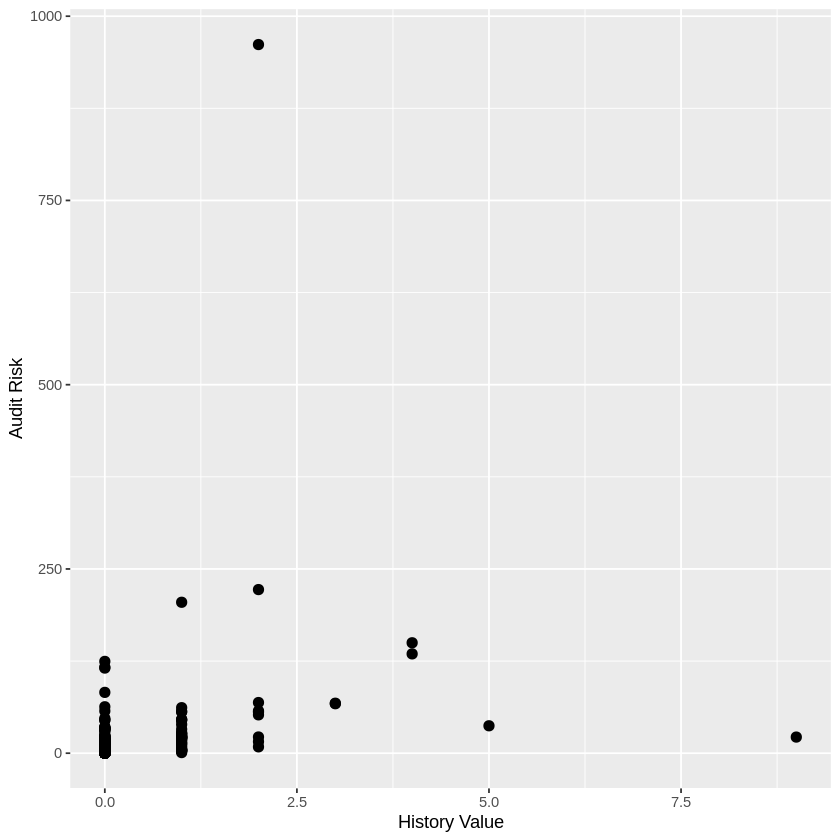

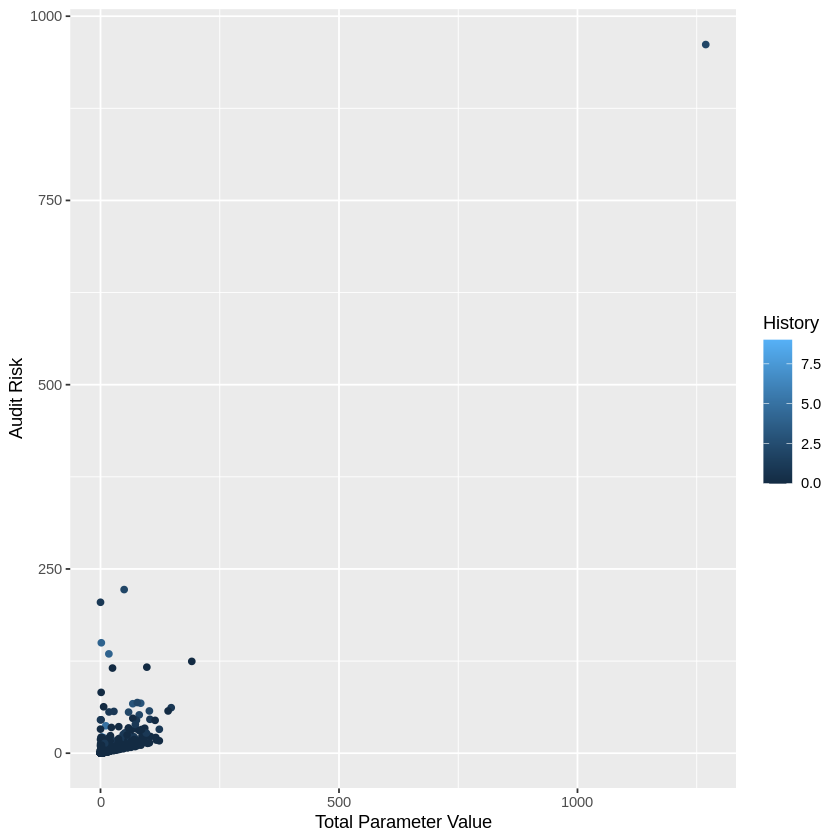

In [9]:
# History Values in Compar to the 


auditRiskSampling_HistoryVal_AudRisk <-    ggplot(auditRiskSampling,  aes(x= History, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "History Value", y = "Audit Risk") 
    
auditRiskSampling_HistoryVal_AudRisk

print(cor(auditRiskSampling$History, auditRiskSampling$Audit_Risk)) #Correlation of Para_B and Audit_Risk

summary(auditRiskSampling$History)




auditRiskSampling_VIZ_Total <-    ggplot(auditRiskSampling,  aes(x= TOTAL, y= Audit_Risk)) +
                              geom_point(aes(color = History)) +
                            labs(x = "Total Parameter Value", y = "Audit Risk") 
    
auditRiskSampling_VIZ_Total


[1] 0.1994257


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.505   2.000   6.000 

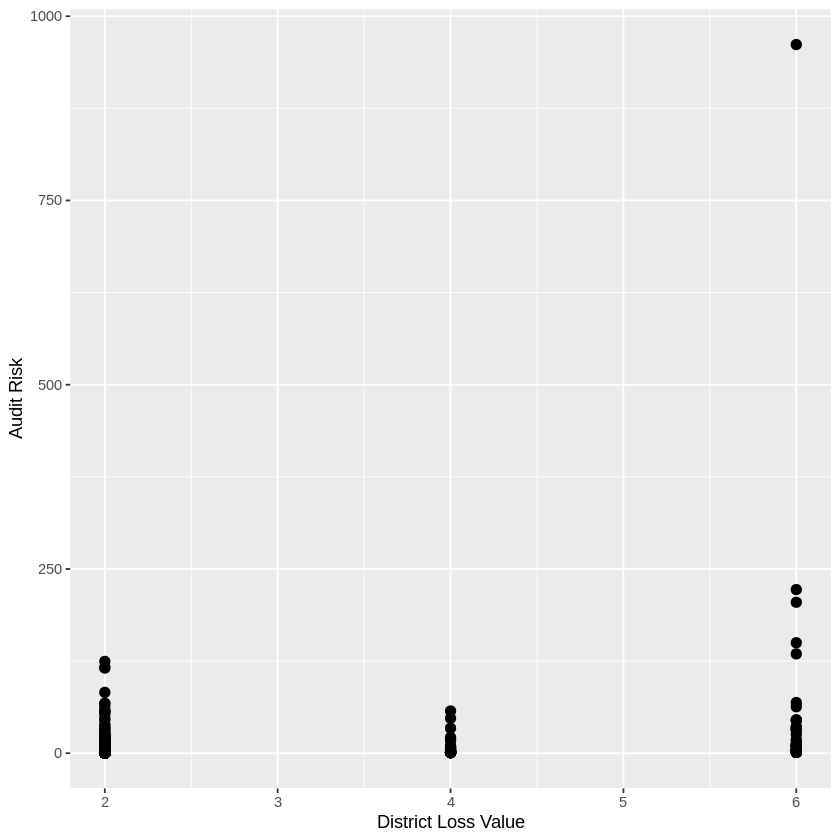

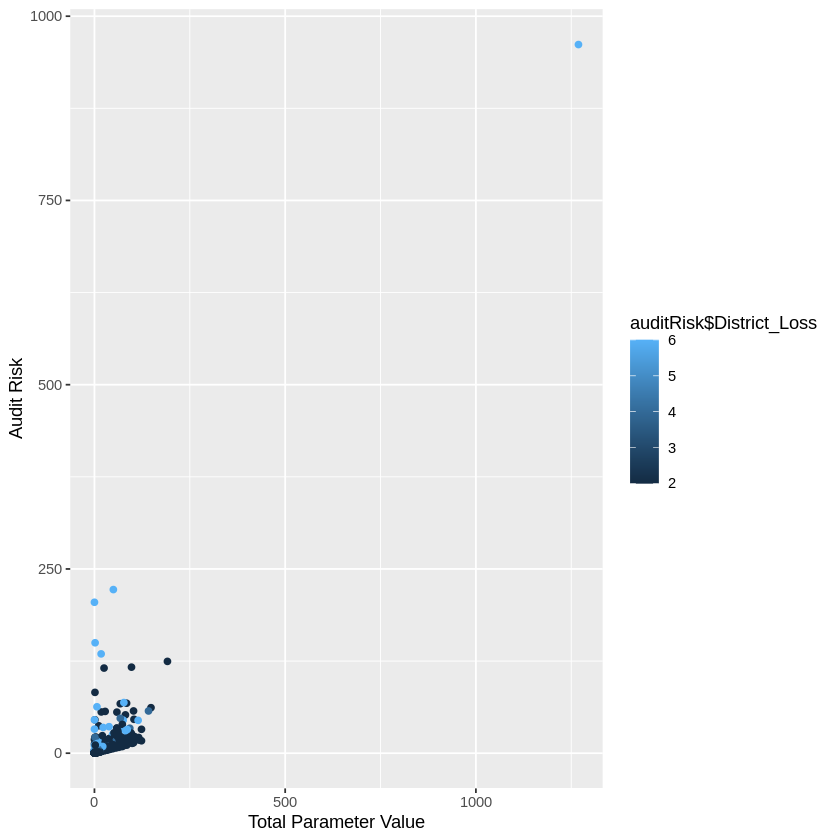

In [10]:
# Play Around with District Loss     (Catagotical Variable)  -- Might not be Necessary but a good addition 


auditRisk_DistrictLoss_AudRisk <-    ggplot(auditRisk,  aes(x= District_Loss, y= Audit_Risk)) +
                              geom_point(size = 2.5) +
                            labs(x = "District Loss Value", y = "Audit Risk") 
    
auditRisk_DistrictLoss_AudRisk

print(cor(auditRisk$District_Loss, auditRisk$Audit_Risk)) #Correlation of Para_B and Audit_Risk

summary(auditRisk$District_Loss)


auditRiskSampling_VIZ_Total1 <- ggplot(auditRisk,  aes(x= TOTAL, y= Audit_Risk)) +
                              geom_point(aes(color = auditRisk$District_Loss)) +
                            labs(x = "Total Parameter Value", y = "Audit Risk") 

auditRiskSampling_VIZ_Total1



**** Linear Regression Analysis knn regression vs Linear Regression****


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,49.44377,5,17.38927,Model01
4,rmse,standard,39.36961,5,13.12432,Model02
7,rmse,standard,35.74746,5,13.73736,Model03
10,rmse,standard,33.00197,5,14.47860,Model04
13,rmse,standard,32.24801,5,14.67108,Model05
16,rmse,standard,32.23801,5,14.62468,Model06
19,rmse,standard,31.69466,5,14.82380,Model07
22,rmse,standard,31.31167,5,14.98367,Model08
25,rmse,standard,31.52294,5,14.92677,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
187,rmse,standard,29.18782,5,15.66056,Model63


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.33499830
rsq,standard,0.04815315
mae,standard,7.17364123


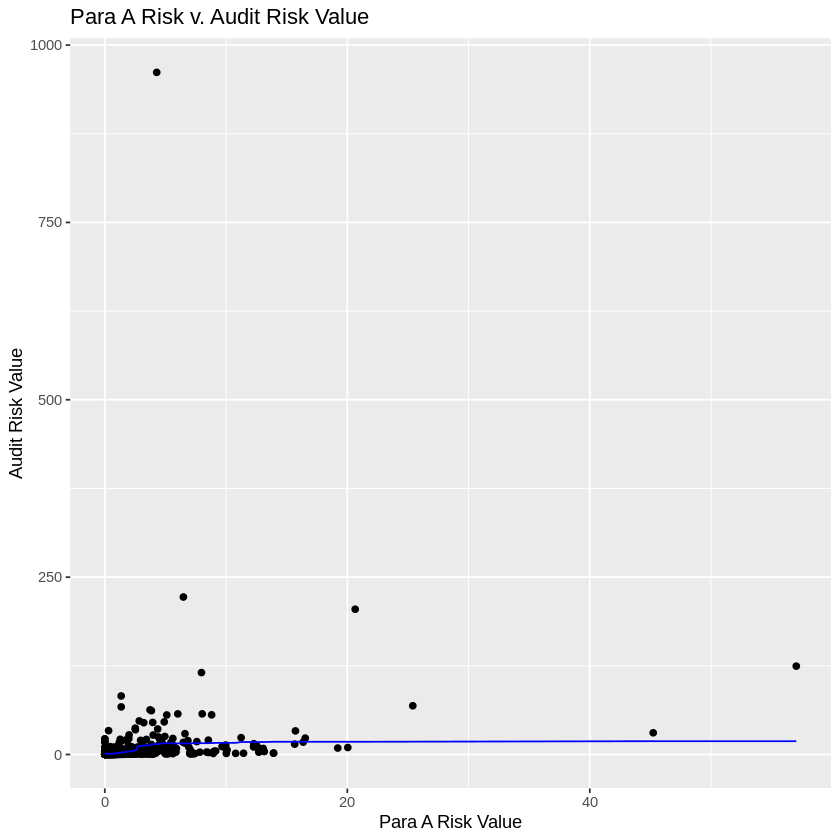

In [11]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and Para_A as an initial example 


auditRiskSampling_split <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train <- training(auditRiskSampling_split)
auditRiskSampling_test <- testing(auditRiskSampling_split)


auditRiskSampling_recipe <- recipe(Audit_Risk ~ PARA_A, data = auditRiskSampling_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

auditRiskSampling_vfold <- vfold_cv(auditRiskSampling_train, v = 5, strata = Audit_Risk)

auditRiskSampling_wkflw <- workflow() %>%
  add_recipe(auditRiskSampling_recipe) %>%
  add_model(auditRiskSampling_spec)

auditRiskSampling_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

auditRiskSampling_results <- auditRiskSampling_wkflw %>%
  tune_grid(resamples = auditRiskSampling_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
auditRiskSampling_results
#Prediction 




#Show Minimum RMSPE along with it's associated metrics such as the mean and standard error, for best K Value


auditRiskSampling_min <- auditRiskSampling_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
  #  filter(mean == min(mean)) %>%
    slice(1)
auditRiskSampling_min    # k = 7 



# Nearest Neighbours 


k_min <- auditRiskSampling_min %>%
          pull(neighbors)

auditRiskSampling_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

auditRiskSampling_best_fit <- workflow() %>%
          add_recipe(auditRiskSampling_recipe) %>%
          add_model(auditRiskSampling_best_spec) %>%
          fit(data = auditRiskSampling_train)

auditRiskSampling_summary <- auditRiskSampling_best_fit %>%
           predict(auditRiskSampling_train) %>%
           bind_cols(auditRiskSampling_train) %>%
           metrics(truth = Audit_Risk, estimate = .pred)



auditRiskSampling_summary






auditRiskSampling_preds <- auditRiskSampling_best_fit %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_plot <- auditRiskSampling_preds %>%
    ggplot( aes(x = PARA_A , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Para A Risk Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_preds, mapping = aes(x = PARA_A, y = .pred), color = "blue") +
    ggtitle("Para A Risk v. Audit Risk Value")

    
    
auditRiskSampling_plot


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,35.33118,5,12.81593,Model01
4,rmse,standard,32.54744,5,14.20653,Model02
7,rmse,standard,31.95116,5,14.28066,Model03
10,rmse,standard,31.44907,5,14.48576,Model04
13,rmse,standard,31.49880,5,14.53578,Model05
16,rmse,standard,31.46977,5,14.58499,Model06
19,rmse,standard,31.51595,5,14.53280,Model07
22,rmse,standard,31.18062,5,14.62309,Model08
25,rmse,standard,31.01182,5,14.67670,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
79,rmse,standard,30.92559,5,14.89246,Model27


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.2779834
rsq,standard,0.1284444
mae,standard,7.0875329


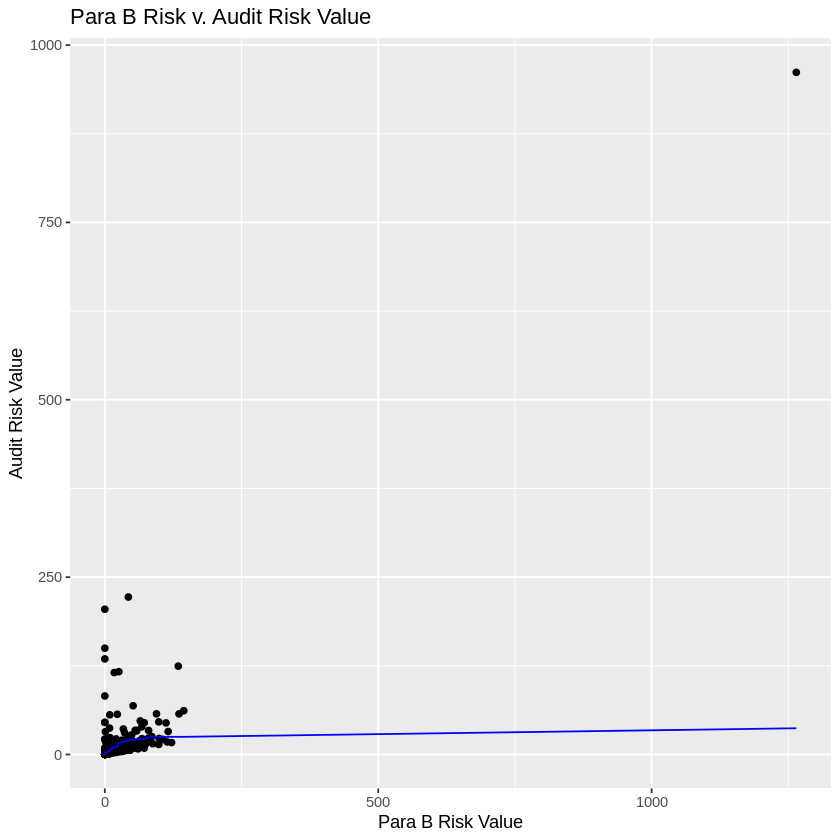

In [12]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and Para_B as an initial example 


auditRiskSampling_split <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train <- training(auditRiskSampling_split)
auditRiskSampling_test <- testing(auditRiskSampling_split)


auditRiskSampling_PARAB_recipe <- recipe(Audit_Risk ~ PARA_B, data = auditRiskSampling_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_PARAB_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

auditRiskSampling_PARAB_vfold <- vfold_cv(auditRiskSampling_train, v = 5, strata = Audit_Risk)

auditRiskSampling_PARAB_wkflw <- workflow() %>%
  add_recipe(auditRiskSampling_PARAB_recipe) %>%
  add_model(auditRiskSampling_PARAB_spec)

auditRiskSampling_PARAB_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

auditRiskSampling_PARAB_results <- auditRiskSampling_PARAB_wkflw %>%
  tune_grid(resamples = auditRiskSampling_PARAB_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
auditRiskSampling_PARAB_results
#Prediction 




#Show Minimum RMSPE along with it's associated metrics such as the mean and standard error, for best K Value


auditRiskSampling_PARAB_min <- auditRiskSampling_PARAB_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
  #  filter(mean == min(mean)) %>%
    slice(1)
auditRiskSampling_PARAB_min    # k = 



# Nearest Neighbours 


k_min <- auditRiskSampling_PARAB_min %>%
          pull(neighbors)

auditRiskSampling_PARAB_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

auditRiskSampling__PARAB_best_fit <- workflow() %>%
          add_recipe(auditRiskSampling_PARAB_recipe) %>%
          add_model(auditRiskSampling_PARAB_best_spec) %>%
          fit(data = auditRiskSampling_train)

auditRiskSampling_PARAB_summary <- auditRiskSampling__PARAB_best_fit %>%
           predict(auditRiskSampling_train) %>%
           bind_cols(auditRiskSampling_train) %>%
           metrics(truth = Audit_Risk, estimate = .pred)



auditRiskSampling_PARAB_summary






auditRiskSampling_PARAB_preds <- auditRiskSampling__PARAB_best_fit %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_PARAB_plot <- auditRiskSampling_PARAB_preds %>%
    ggplot( aes(x = PARA_B , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Para B Risk Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_PARAB_preds, mapping = aes(x = PARA_B, y = .pred), color = "blue") +
    ggtitle("Para B Risk v. Audit Risk Value")

    
    
auditRiskSampling_PARAB_plot


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,31.20803,5,12.61612,Model01
4,rmse,standard,29.95622,5,14.05270,Model02
7,rmse,standard,29.24430,5,14.58047,Model03
10,rmse,standard,29.11887,5,14.77361,Model04
13,rmse,standard,28.71591,5,14.79746,Model05
16,rmse,standard,28.87311,5,14.87711,Model06
19,rmse,standard,28.78321,5,14.96915,Model07
22,rmse,standard,28.70220,5,14.98778,Model08
25,rmse,standard,28.76708,5,15.02370,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
22,rmse,standard,28.7022,5,14.98778,Model08


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,39.6250035
rsq,standard,0.2498841
mae,standard,6.7547751


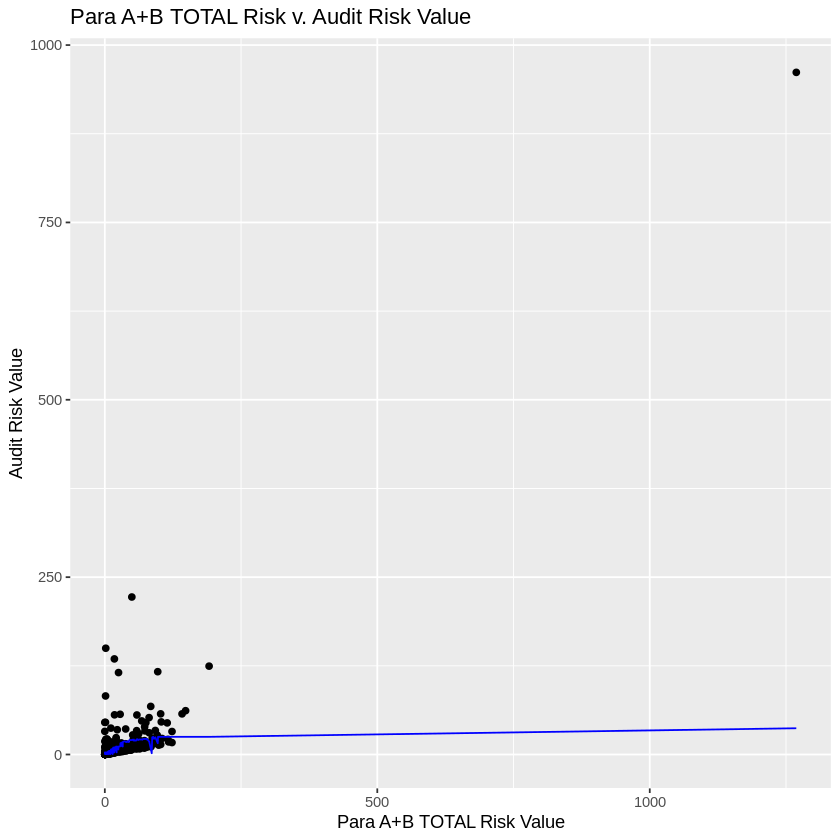

In [13]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and TOTAL as an initial example 


auditRiskSampling_split <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train <- training(auditRiskSampling_split)
auditRiskSampling_test <- testing(auditRiskSampling_split)


auditRiskSampling_TOTAL_recipe <- recipe(Audit_Risk ~ TOTAL, data = auditRiskSampling_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_TOTAL_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

auditRiskSampling_TOTAL_vfold <- vfold_cv(auditRiskSampling_train, v = 5, strata = Audit_Risk)

auditRiskSampling_TOTAL_wkflw <- workflow() %>%
  add_recipe(auditRiskSampling_TOTAL_recipe) %>%
  add_model(auditRiskSampling_TOTAL_spec)

auditRiskSampling_TOTAL_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

auditRiskSampling_TOTAL_results <- auditRiskSampling_TOTAL_wkflw %>%
  tune_grid(resamples = auditRiskSampling_TOTAL_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
auditRiskSampling_TOTAL_results
#Prediction 




#Show Minimum RMSPE along with it's associated metrics such as the mean and standard error, for best K Value


auditRiskSampling_TOTAL_min <- auditRiskSampling_TOTAL_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
  #  filter(mean == min(mean)) %>%
    slice(1)
auditRiskSampling_TOTAL_min    # k = 



# Nearest Neighbours 


k_min <- auditRiskSampling_TOTAL_min %>%
          pull(neighbors)

auditRiskSampling_TOTAL_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

auditRiskSampling__TOTAL_best_fit <- workflow() %>%
          add_recipe(auditRiskSampling_TOTAL_recipe) %>%
          add_model(auditRiskSampling_TOTAL_best_spec) %>%
          fit(data = auditRiskSampling_train)

auditRiskSampling_TOTAL_summary <- auditRiskSampling__TOTAL_best_fit %>%
           predict(auditRiskSampling_train) %>%
           bind_cols(auditRiskSampling_train) %>%
           metrics(truth = Audit_Risk, estimate = .pred)



auditRiskSampling_TOTAL_summary






auditRiskSampling_TOTAL_preds <- auditRiskSampling__TOTAL_best_fit %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_TOTAL_plot <- auditRiskSampling_TOTAL_preds %>%
    ggplot( aes(x = TOTAL , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Para A+B TOTAL Risk Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_PARAB_preds, mapping = aes(x = TOTAL, y = .pred), color = "blue") +
    ggtitle("Para A+B TOTAL Risk v. Audit Risk Value")

    
    
auditRiskSampling_TOTAL_plot


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,14.59567,5,2.980978,Model01
4,rmse,standard,13.10542,5,2.377899,Model02
7,rmse,standard,12.98768,5,2.338684,Model03
10,rmse,standard,13.37669,5,1.799182,Model04
13,rmse,standard,13.41483,5,1.674195,Model05
16,rmse,standard,13.36901,5,1.824310,Model06
19,rmse,standard,13.47309,5,1.982183,Model07
22,rmse,standard,13.76794,5,2.038572,Model08
25,rmse,standard,14.04544,5,2.075349,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,12.98768,5,2.338684,Model03


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.6500062
rsq,standard,0.6258288
mae,standard,3.5890895


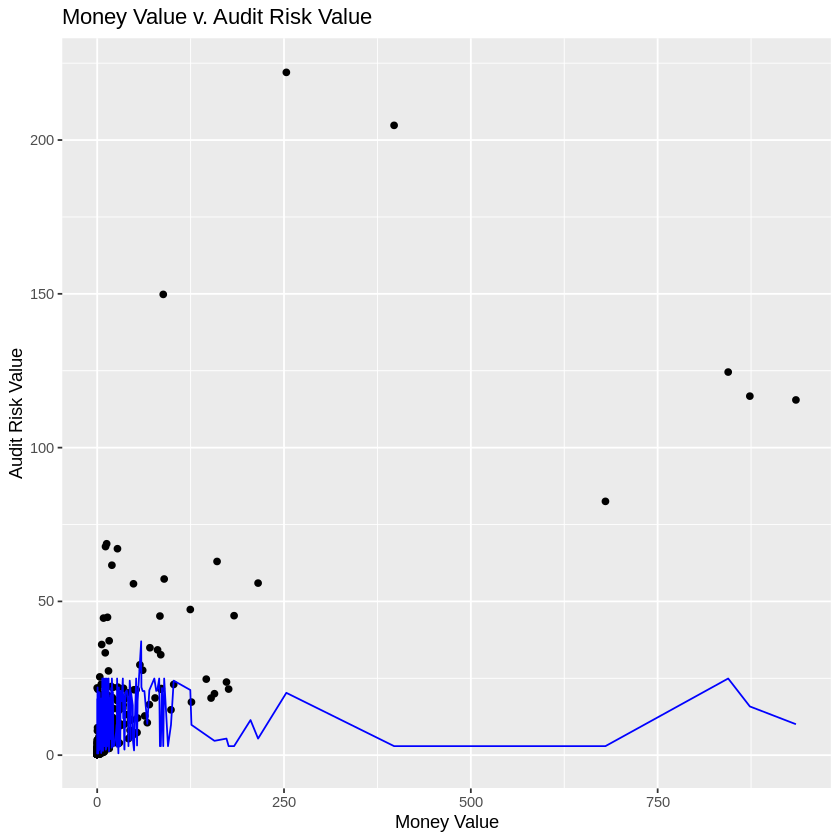

In [14]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and Money_Value as an initial example 
## Money_Value AS MV


auditRiskSampling_split <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train <- training(auditRiskSampling_split)
auditRiskSampling_test <- testing(auditRiskSampling_split)


auditRiskSampling_MV_recipe <- recipe(Audit_Risk ~ Money_Value, data = auditRiskSampling_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_MV_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

auditRiskSampling_MV_vfold <- vfold_cv(auditRiskSampling_train, v = 5, strata = Audit_Risk)

auditRiskSampling_MV_wkflw <- workflow() %>%
  add_recipe(auditRiskSampling_MV_recipe) %>%
  add_model(auditRiskSampling_MV_spec)

auditRiskSampling_MV_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

auditRiskSampling_MV_results <- auditRiskSampling_MV_wkflw %>%
  tune_grid(resamples = auditRiskSampling_MV_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
auditRiskSampling_MV_results
#Prediction 




#Show Minimum RMSPE along with it's associated metrics such as the mean and standard error, for best K Value


auditRiskSampling_MV_min <- auditRiskSampling_MV_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
  #  filter(mean == min(mean)) %>%
    slice(1)
auditRiskSampling_MV_min    # k = 



# Nearest Neighbours 


k_min <- auditRiskSampling_MV_min %>%
          pull(neighbors)

auditRiskSampling_MV_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

auditRiskSampling_MV_best_fit <- workflow() %>%
          add_recipe(auditRiskSampling_MV_recipe) %>%
          add_model(auditRiskSampling_MV_best_spec) %>%
          fit(data = auditRiskSampling_train)

auditRiskSampling_MV_summary <- auditRiskSampling_MV_best_fit %>%
           predict(auditRiskSampling_train) %>%
           bind_cols(auditRiskSampling_train) %>%
           metrics(truth = Audit_Risk, estimate = .pred)



auditRiskSampling_MV_summary






auditRiskSampling_MV_preds <- auditRiskSampling_MV_best_fit %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_MV_plot <- auditRiskSampling_MV_preds %>%
    ggplot( aes(x = Money_Value , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Money Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_PARAB_preds, mapping = aes(x = Money_Value, y = .pred), color = "blue") +
    ggtitle("Money Value v. Audit Risk Value")

    
    
auditRiskSampling_MV_plot


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.33499830
rsq,standard,0.04815315
mae,standard,7.17364123


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,16.4170814
rsq,standard,0.2546064
mae,standard,6.4091486


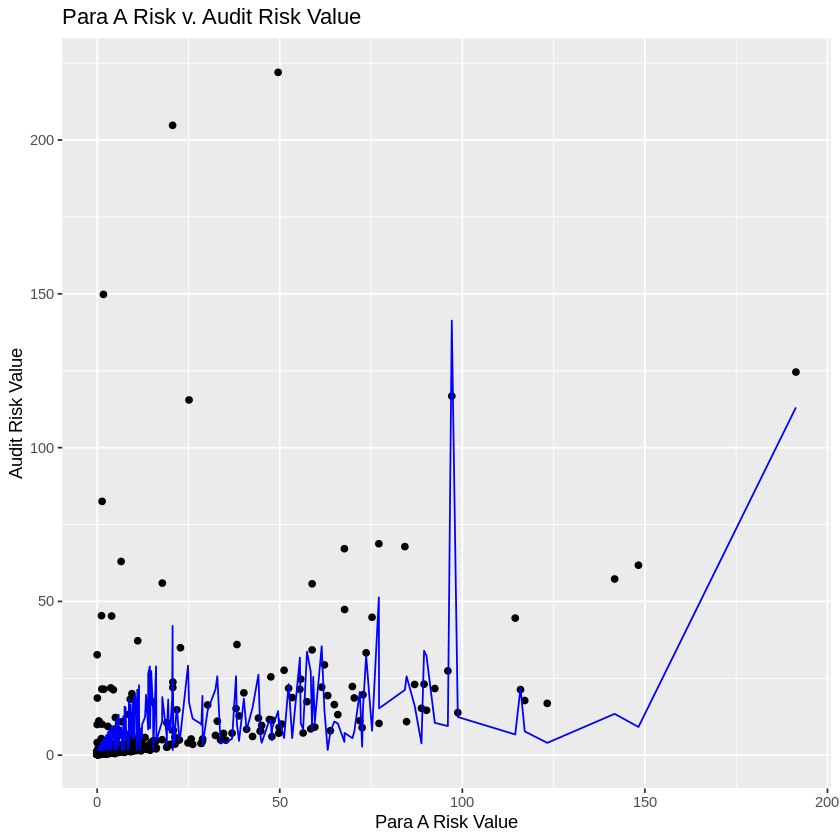

In [25]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and Para_A, PARA_B as an initial example 





# Nearest Neighbours 


# Linear

auditRiskSampling_split2 <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train2 <- training(auditRiskSampling_split)
auditRiskSampling_test2 <- testing(auditRiskSampling_split)

auditRiskSampling_recipe2 <- recipe(Audit_Risk ~ PARA_A, PARA_B, data = auditRiskSampling_train2) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_spec2 <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

auditRiskSampling_fit2 <- workflow() %>%
  add_recipe(auditRiskSampling_recipe2) %>%
  add_model(auditRiskSampling_spec2) %>%
  fit(auditRiskSampling_train2)

auditRiskSampling_summary2 <- auditRiskSampling_fit2 %>%
    predict(auditRiskSampling_train2) %>%
    bind_cols(auditRiskSampling_train2) %>%
    metrics(truth = Audit_Risk, estimate = .pred)

auditRiskSampling_summary

auditRiskSampling_summary2




auditRiskSampling_preds <- auditRiskSampling_fit2 %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_plot <- auditRiskSampling_preds %>%
    ggplot( aes(x = PARA_A + PARA_B  , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Para A Risk Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_preds, mapping = aes(x = PARA_A + PARA_B, y = .pred), color = "blue") +
    ggtitle("Para A Risk v. Audit Risk Value")

    
    
auditRiskSampling_plot


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.33499830
rsq,standard,0.04815315
mae,standard,7.17364123


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.6148439
rsq,standard,0.4873522
mae,standard,5.2270911


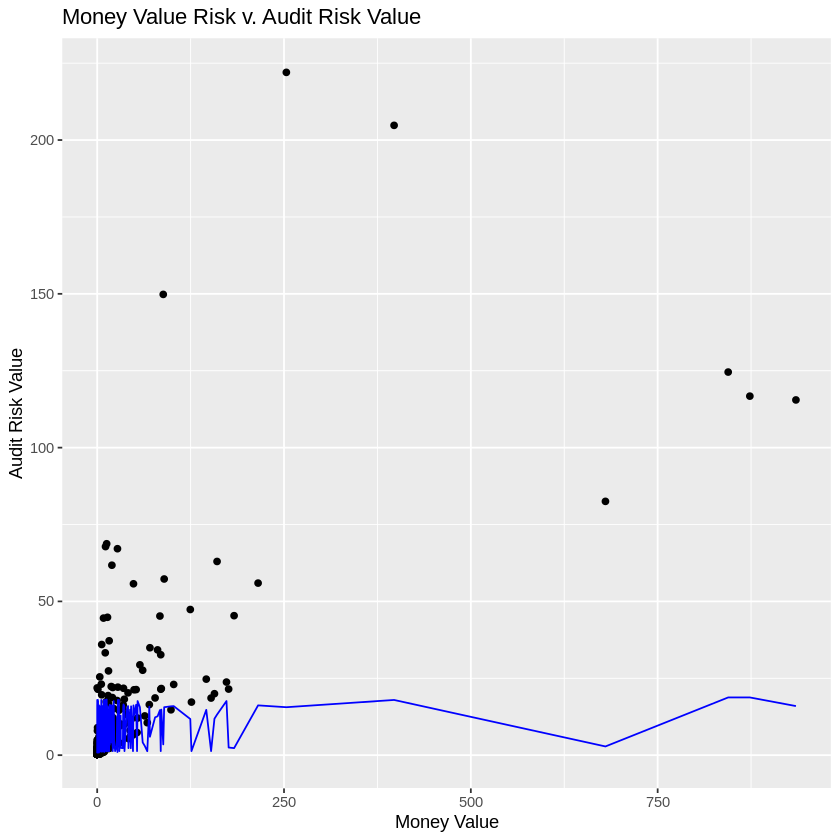

In [20]:


#K-NN Regression Model of the Audt Data: 

## This example we will be using Audit_Risk and Money_Value as an initial example 





# Nearest Neighbours 


# Linear

auditRiskSampling_split2 <- initial_split(auditRiskSampling, prop = 0.75, strata = Audit_Risk)
auditRiskSampling_train2 <- training(auditRiskSampling_split)
auditRiskSampling_test2 <- testing(auditRiskSampling_split)

auditRiskSampling_recipeMV <- recipe(Audit_Risk ~ Money_Value, data = auditRiskSampling_train2) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

auditRiskSampling_specMV <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

auditRiskSampling_fitMV <- workflow() %>%
  add_recipe(auditRiskSampling_recipeMV) %>%
  add_model(auditRiskSampling_specMV) %>%
  fit(auditRiskSampling_train2)

auditRiskSampling_summaryMV <- auditRiskSampling_fitMV %>%
    predict(auditRiskSampling_train2) %>%
    bind_cols(auditRiskSampling_train2) %>%
    metrics(truth = Audit_Risk, estimate = .pred)

auditRiskSampling_summary

auditRiskSampling_summaryMV




auditRiskSampling_predsMV <- auditRiskSampling_fitMV %>%
    predict(auditRiskSampling_train) %>%
    bind_cols(auditRiskSampling_train)



auditRiskSampling_plot <- auditRiskSampling_predsMV %>%
    ggplot( aes(x = Money_Value , y = Audit_Risk)) +
     geom_point() + 
    labs(x = "Money Value", y = "Audit Risk Value") +
  #  labs(x = "time in hours", y = "max distance ran per week")
   geom_line(data = auditRiskSampling_preds, mapping = aes(x = Money_Value, y = .pred), color = "blue") +
    ggtitle("Money Value Risk v. Audit Risk Value")

    
    
auditRiskSampling_plot


Now We need to make it down to the other trial.csv to test our model of predicting at risk firms 

In [29]:
#trial
trialSampling <- trial%>%
    select(Sector_score, LOCATION_ID, PARA_A, PARA_B, TOTAL, Money_Value, History, Risk)%>%
    drop_na()
trialSampling



Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,Money_Value,History,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,2.50,6.68,3.380,0,1
3.89,6,0.00,4.83,4.83,0.940,0,0
3.89,6,0.51,0.23,0.74,0.000,0,0
3.89,6,0.00,10.80,10.80,11.750,0,1
3.89,6,0.00,0.08,0.08,0.000,0,0
3.89,6,0.00,0.83,0.83,2.950,0,0
3.89,7,1.10,7.41,8.51,44.950,0,1
3.89,8,8.50,12.03,20.53,7.790,0,1
3.89,8,8.40,11.05,19.45,7.340,0,1


In [31]:
# Now we will try to analyze and attempt to get the Risk Score from using the parameters PARA_A, PARA_B, TOTAL, Money_Value


#trialSampling

In [ ]:

#If we are dividing the classification model into seperate sectors, use this model


# Try to select Irrigation Firms (114) and see what relations classification holds 

irrigationSample <- auditRisk %>%
    slice(1:114) %>%
    drop_na()

5count(irrigationSample) 

#summary(irrigationSample) #Sector Score 3.89 


iSam_1 <- select(irrigationSample, PARA_A, Score_A, Risk_A, Inherent_Risk)
#iSam_1
#summary(iSam_1)
